In [3]:
import pandas as pd; import os; import time; import re;
import numpy as np; import random; import copy; import sys

In [47]:
data = pd.read_csv('unsorted_corpus.csv')

F:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,

In [5]:
data50=data[(data['stars']>2.75) & (data['stars']<4)]

In [6]:
data50.shape

(36668, 534)

In [48]:
del data

In [23]:
data50.head(5)

,business_id,stars,0,1,2,3,4,5,6,7,...,522,523,524,525,526,527,528,529,530,531
2,97870,3.0,good,selection,class,beer,main,twicefirst,time,fry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,101596,3.0,not,best,pizza,not,worst,pepperoni,plenty,variety,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,50808,3.0,food,great,walk,one,dark,haired,guy,greet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,115866,3.0,pizza,delicious,hot,fresh,well,parmesan,fry,jalapeo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,54851,3.0,cute,decor,alldrinks,food,price,quality,portion,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


corpus50 = []
for i in range(data50.shape[0]):
    print(i)
    temp = []
    for k in range(2,534):
        if not data50.iloc[i].notnull()[k]:
            break
        elif data50.iloc[i].notnull()[k]:
             temp.append(data50.iloc[i][k])
    corpus50.append(temp)

In [46]:
print(corpus50[11851])

['pizza', 'better', 'pasta', 'entree', 'order', 'lasagna', 'eh', 'sad', 'say', 'prefer', 'stoffers', 'not', 'good']


In [41]:
import copy

In [70]:
test=copy.deepcopy(corpus50)

In [74]:
test=test[0:20000]

In [75]:
len(test)

20000

In [76]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(test)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in test]

In [100]:
print(doc_term_matrix[])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 2), (30, 3), (31, 2), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 4), (49, 1), (50, 2), (51, 1), (52, 3), (53, 1), (54, 2)], [(22, 1), (32, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)]]


In [77]:
print(dictionary)

Dictionary(40263 unique tokens: ['anything', 'avoid', 'awful', 'bbq', 'beer']...)


In [78]:
lda50=gensim.models.ldamodel.LdaModel

In [82]:
ldamodel = lda50(doc_term_matrix, num_topics=10, id2word = dictionary,alph='auto', passes=50)

In [81]:
print(ldamodel.print_topics(num_topics=5, num_words=5))

[(0, '0.094*"pizza" + 0.025*"not" + 0.019*"good" + 0.016*"crust" + 0.013*"order"'), (1, '0.016*"good" + 0.016*"not" + 0.013*"order" + 0.012*"salad" + 0.011*"chicken"'), (2, '0.021*"not" + 0.021*"place" + 0.020*"good" + 0.018*"food" + 0.011*"beer"'), (3, '0.020*"not" + 0.018*"order" + 0.018*"time" + 0.017*"get" + 0.016*"food"'), (4, '0.092*"wing" + 0.022*"de" + 0.021*"le" + 0.015*"la" + 0.012*"et"')]


In [91]:
testcase=doc_term_matrix[0:4000]

In [94]:
len(testcase)

4000

In [92]:
print(testcase[1])

[(22, 1), (32, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)]


In [101]:
print('\nperplexity:',ldamodel.log_perplexity(doc_term_matrix))


perplexity: -7.650751582620861


In [107]:
from gensim.models import CoherenceModel

In [ ]:
#dignostics

In [108]:
for i in range(5,11):
    print(i)
    ldamodel = lda50(doc_term_matrix, num_topics=i, id2word = dictionary,alpha='auto', passes=50)
    print('\nperplexity:',ldamodel.log_perplexity(doc_term_matrix))
    coherence=CoherenceModel(model=ldamodel,texts=test,dictionary=dictionary,coherence='c_v')
    coherence_lda=coherence.get_coherence()
    print('\ncoherence score:', coherence_lda)

5

perplexity: -7.301924689932775

coherence score: 0.4566255013453042
6

perplexity: -7.325500283776774

coherence score: 0.5536360544774074
7

perplexity: -7.36848308193968

coherence score: 0.562100034258328
8

perplexity: -7.427763554317875

coherence score: 0.5473441937973188
9

perplexity: -7.520398642808694

coherence score: 0.5429878071244258
10

perplexity: -7.615503762233495

coherence score: 0.5257182327233858


In [109]:
ldamodel = lda50(doc_term_matrix, num_topics=7, id2word = dictionary,alpha='auto', passes=50)

In [128]:
print(ldamodel.print_topics(num_topics=7, num_words=10))

[(0, '0.043*"gluten" + 0.039*"vegan" + 0.038*"buffet" + 0.035*"free" + 0.013*"gf" + 0.010*"spago" + 0.007*"m" + 0.005*"whiskey" + 0.005*"cici" + 0.004*"doughnut"'), (1, '0.034*"not" + 0.029*"good" + 0.026*"place" + 0.020*"food" + 0.015*"go" + 0.014*"great" + 0.013*"like" + 0.011*"service" + 0.009*"price" + 0.009*"nice"'), (2, '0.033*"de" + 0.028*"le" + 0.018*"et" + 0.016*"la" + 0.014*"un" + 0.012*"pa" + 0.010*"pour" + 0.008*"est" + 0.007*"je" + 0.007*"mais"'), (3, '0.021*"breakfast" + 0.020*"coffee" + 0.018*"egg" + 0.013*"brunch" + 0.006*"di" + 0.005*"fox" + 0.005*"lgo" + 0.004*"toast" + 0.004*"tot" + 0.004*"poutine"'), (4, '0.026*"order" + 0.024*"time" + 0.022*"get" + 0.017*"take" + 0.016*"come" + 0.015*"not" + 0.014*"wait" + 0.013*"go" + 0.012*"food" + 0.012*"say"'), (5, '0.023*"salad" + 0.016*"chicken" + 0.013*"pasta" + 0.012*"bread" + 0.012*"order" + 0.012*"fry" + 0.012*"sauce" + 0.011*"taste" + 0.010*"good" + 0.010*"dish"'), (6, '0.140*"pizza" + 0.021*"crust" + 0.020*"not" + 0.016

In [114]:
#print(ldamodel.show_topics(formatted=False))

In [133]:
#plot of coherence
coh=[0.4566255013453042,0.5536360544774074,0.562100034258328,0.5473441937973188,0.5429878071244258,0.5257182327233858]
per=[-7.301924689932775,-7.325500283776774,-7.36848308193968,-7.427763554317875,-7.520398642808694,-7.615503762233495]
per=[float(i)/max(per) for i in per]
N_topics=[5,6,7,8,9,10]

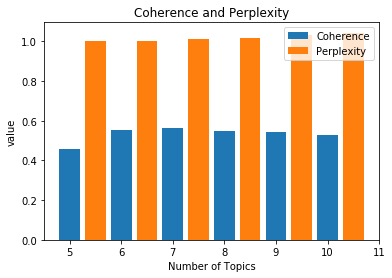

In [134]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.bar(N_topics, coh, width=.4,label='Coherence')

plt.bar([5.5,6.5,7.5,8.5,9.5,10.5],per, width=.4,label='Perplexity')

plt.legend()

plt.xlabel('Number of Topics')
plt.ylabel('value')

plt.title('Coherence and Perplexity')

plt.show()


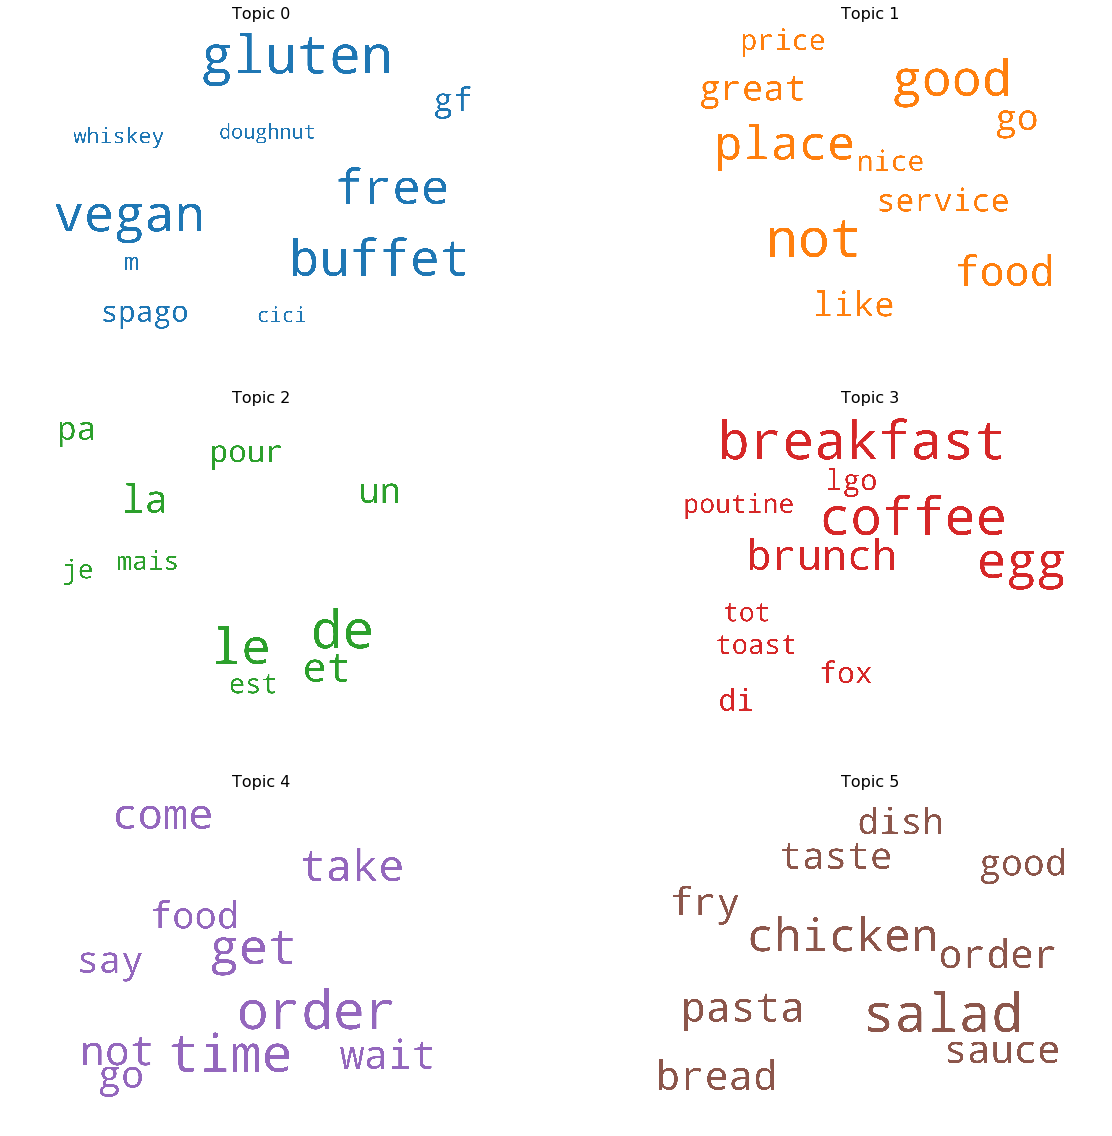

In [131]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
 
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
 
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                 height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
 
topics = ldamodel.show_topics(formatted=False)
 
fig, axes = plt.subplots(3, 2, figsize=(20,20), sharex=True, sharey=True)
 
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

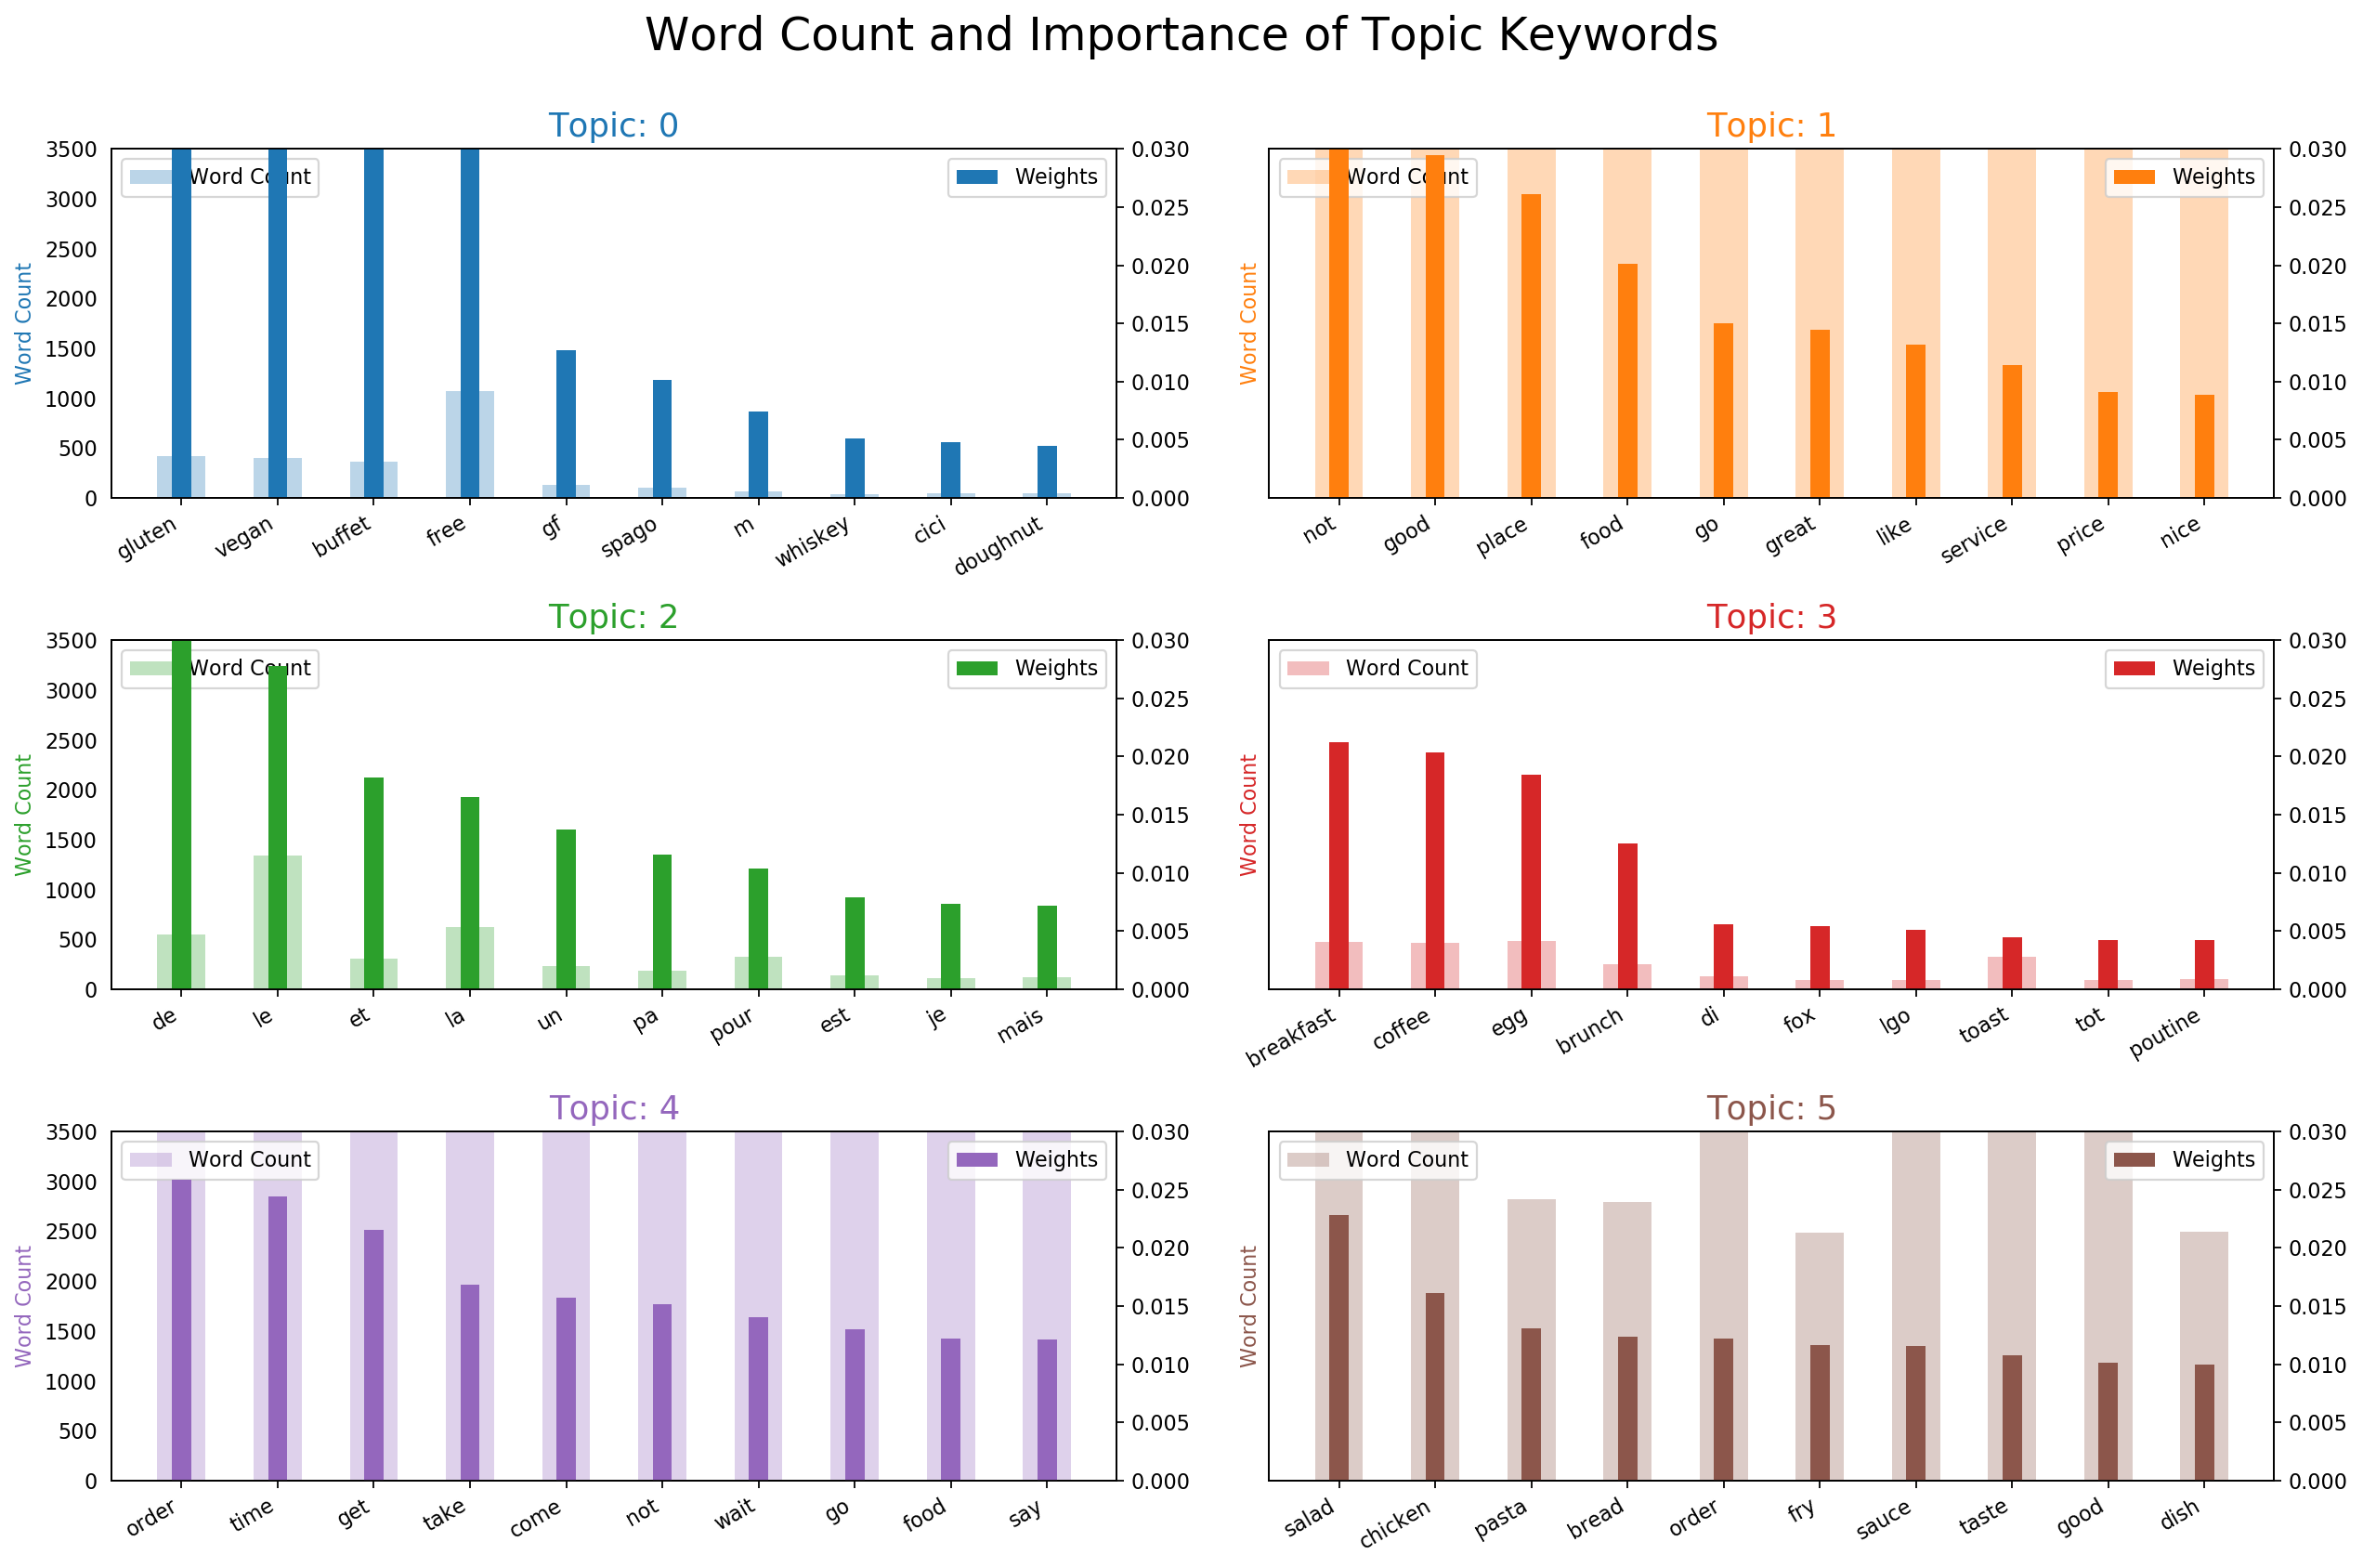

In [135]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in test for w in w_list]
counter = Counter(data_flat)
 
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])
 
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
 
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
 
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()